### load data

In [4]:
require(tidyverse)
require(data.table)

glists <- list()
for(f in list.files("./dat/glists/","*.tsv")){
    if(!grepl("V2",f)){
        fn<- unlist(strsplit(f,"_"))[4]
        glists[[fn]] <- fread(paste0("./dat/glists/",f))
        glists[[fn]]$sources <- fn
    }
}

glists.df <- do.call(rbind,glists)%>%
    unite("category",c("subtype","sources"),remove = F)
all.cates <- unique(glists.df$category)

In [5]:
save(list = c("glists","glists.df"),file = './dat/glists/glists.Rdata')

In [24]:
# for GSEApy, create gsets 
fn=file("./dat/glists/gsea.gmt","w")
for(p in all.cates){
    cat(paste(c(p,'na',subset(glists.df,category==p)$gene),collapse =  "\t"),sep = "\n",file = fn)
}
close(fn)

### check whether we can find all genes 

In [98]:
# load all genes 
raw.res <- fread('./dat/alpha.100_bin_pseudotime_raw.promoter.txt')
all.genes <- colnames(raw.res)
rm(raw.res)
lapply(glists,function(x) data.frame(in.num=sum(x$gene %in% all.genes),tot.num=length(x$gene))%>%
       mutate(miss.num=tot.num-in.num))

in.num,tot.num,miss.num
486,651,165
in.num,tot.num,miss.num
173,213,40
in.num,tot.num,miss.num
369,444,75
in.num,tot.num,miss.num
3766,3766,0
in.num,tot.num,miss.num
495,495,0


### converted to ensembl id and then compare

### Venn intersection

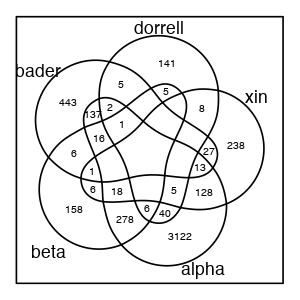

In [26]:
options(repr.plot.width =2.5, repr.plot.height = 2.5)
require(venn)
glists.sub1 <- sapply(names(glists),function(x) glists[[x]]$gene)
venn(glists.sub1,cexil = .5)

Not that imformative

In [18]:
str(glists)

List of 5
 $ bader  :Classes ‘data.table’ and 'data.frame':	651 obs. of  2 variables:
  ..$ gene   : chr [1:651] "SYNGAP1" "SMARCA1" "NHSL1" "ZDBF2" ...
  ..$ subtype: chr [1:651] "mature" "mature" "mature" "mature" ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ dorrell:Classes ‘data.table’ and 'data.frame':	213 obs. of  2 variables:
  ..$ gene   : chr [1:213] "ST8SIA1" "ATP8A2" "HCN1" "CHD5" ...
  ..$ subtype: chr [1:213] "ST8SIA1+" "ST8SIA1+" "ST8SIA1+" "ST8SIA1+" ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ xin    :Classes ‘data.table’ and 'data.frame':	444 obs. of  2 variables:
  ..$ gene   : chr [1:444] "RBP4" "SCGN" "FFAR4" "TMED6" ...
  ..$ subtype: chr [1:444] "Beta sub1" "Beta sub1" "Beta sub1" "Beta sub1" ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ alpha  :Classes ‘data.table’ and 'data.frame':	3766 obs. of  2 variables:
  ..$ gene   : chr [1:3766] "AAGAB" "AAMDC" "AASDH" "AATF" ...
  ..$ subtype: chr [1:3766] "A1" "A1" "A1" "A1" ...
  ..- a

In [82]:
cat("bader's genes:")
glists$bader$gene[order(glists$bader$gene)]
cat("our alpha genes:")
glists$beta$gene

bader's genes:

[1] "AATF"      "ABCF3"     "ABHD12"    "ABHD2"     "ACAT1"     "ACIN1"    
  [7] "ACO2"      "ACTL6A"    "AHSA1"     "AIP"       "AKTIP"     "ALG12"    
 [13] "ALG3"      "ALKBH6"    "AMIGO2"    "AMPD2"     "ANKRD10"   "AP1M2"    
 [19] "AP1S1"     "AP3S2"     "APBB3"     "APOC1"     "APOL6"     "ARFGAP3"  
 [25] "ARFIP2"    "ARHGDIG"   "ASB5"      "ASGR2"     "ASNA1"     "ASPRV1"   
 [31] "ASPSCR1"   "ATF6B"     "ATOX1"     "ATP2A3"    "ATP5MC3"   "ATP5ME"   
 [37] "ATP6AP1"   "ATP6V0A2"  "ATP6V0D1"  "ATP6V0E2"  "ATP6V1E1"  "ATPAF2"   
 [43] "B9D1"      "BACE2"     "BANF1"     "BASP1"     "BAZ1A"     "BBS9"     
 [49] "BCKDK"     "BMP1"      "BOLA3"     "BPGM"      "BPHL"      "C11orf58" 
 [55] "C12orf60"  "C15orf40"  "C19orf57"  "C19orf70"  "C1orf127"  "C1orf21"  
 [61] "C1QTNF4"   "C5orf51"   "C6orf89"   "C7orf31"   "C9orf16"   "C9orf64"  
 [67] "CAD"       "CARHSP1"   "CAV1"      "CCDC32"    "CCDC80"    "CCDC92"   
 [73] "CCNL2"     "CCT7"      "CD3D"      "CDC23"     "CDHR1"     "CDK16"    
 [79] "CDK5"      "CFAP410"   "CHCHD10"   "CHCHD3"    "CHID1"     "CHRAC1"   
 [85] "CHURC1"    "CIAO1"     "CIB1"      "CIB3"      "CLCN7"     "CLK3"     
 [91] "CLN6"      "CLNS1A"    "CLPP"      "CLPTM1"    "CNN1"      "CNPY3"    
 [97] "COASY"     "COMMD1"    "COMMD2"    "COMT"      "COPA"      "COPB2"    
[103] "COPS6"     "COPS8"     "COQ10A"    "COQ2"      "CORO2B"    "CPT2"     
[109] "CREG1"     "CRELD2"    "CSNK2B"    "CSPP1"     "CSTA"      "CTSO"     
[115] "CUL7"      "CX3CR1"    "CXXC4"     "CYB5B"     "CYP4F8"    "DALRD3"   
[121] "DBNL"      "DCAF11"    "DCAKD"     "DCTN2"     "DDB1"      "DDOST"    
[127] "DDX31"     "DDX3X"     "DECR2"     "DEDD"      "DEFB118"   "DEGS1"    
[133] "DERL2"     "DERL3"     "DGCR2"     "DHDDS"     "DISP2"     "DLX2"     
[139] "DNAJB12"   "DNAJB6"    "DNAJC12"   "DNAJC15"   "DNTT"      "DOCK7"    
[145] "DPM3"      "DPP3"      "DPP9"      "DRAP1"     "DRD2"      "DUSP12"   
[151] "DVL3"      "ECH1"      "ECHS1"     "ECSIT"     "EGLN1"     "EIF1B"    
[157] "EIF2B5"    "EIF3B"     "EIF3G"     "ELOF1"     "ELP3"      "ENDOG"    
[163] "ENHO"      "ENSA"      "ENTPD3"    "ESRP1"     "ETFB"      "ETNK1"    
[169] "EXOSC4"    "FADS3"     "FAM149B1"  "FAM151A"   "FAM173A"   "FAM174B"  
[175] "FAM20C"    "FARSA"     "FASTK"     "FBH1"      "FBXO2"     "FBXO9"    
[181] "FDFT1"     "FDPS"      "FFAR1"     "FKBP1B"    "FKBP4"     "FKBP9"    
[187] "FLII"      "FN3KRP"    "FUBP3"     "FZD3"      "G3BP2"     "G6PC2"    
[193] "G6PC3"     "G6PD"      "GALC"      "GALE"      "GALK2"     "GANAB"    
[199] "GARS"      "GBA"       "GCK"       "GGA3"      "GGCX"      "GHITM"    
[205] "GIPR"      "GLIS1"     "GLOD4"     "GLP1R"     "GLRX"      "GLRX5"    
[211] "GLTP"      "GMPPA"     "GMPPB"     "GOT1"      "GPAA1"     "GPC4"     
[217] "GPR107"    "GPR108"    "GPR180"    "GPR83"     "GRIA3"     "GRIN1"    
[223] "GSTK1"     "GSTM3"     "GTF2H5"    "GTF3C4"    "GUK1"      "GUSB"     
[229] "HADH"      "HAGH"      "HARS"      "HDAC3"     "HRC"       "HSBP1"    
[235] "HYOU1"     "ICAM2"     "IDH2"      "IDH3B"     "IFT27"     "IGFBP4"   
[241] "IMP4"      "IMPA1"     "IMPDH1"    "INSRR"     "IRAK1"     "ISCA2"    
[247] "ISOC1"     "ITGA9"     "ITGB1BP1"  "ITPKB"     "JAGN1"     "JKAMP"    
[253] "KANSL2"    "KCNH1"     "KCNV1"     "KDELR1"    "KIAA1191"  "KIF6"     
[259] "KLHL22"    "KLHL9"     "KLRD1"     "KRT12"     "L3MBTL2"   "LANCL1"   
[265] "LARS"      "LIX1L"     "LMTK2"     "LOXL2"     "LSM1"      "LSM3"     
[271] "LSS"       "MAD2L2"    "MADD"      "MAN2B2"    "MANBAL"    "MAPK3"    
[277] "MBTPS1"    "MDFI"      "MEA1"      "MECP2"     "MED11"     "MED27"    
[283] "MED28"     "MEN1"      "METTL1"    "METTL7A"   "MFSD11"    "MGST3"    
[289] "MKNK1"     "MORN4"     "MPEG1"     "MPV17L2"   "MRPL12"    "MRPL14"   
[295] "MRPL17"    "MRPL18"    "MRPL2"     "MRPL34"    "MRPL44"    "MRPL54"   
[301] "MRPS10"    "MRPS11"    "MRPS14"    "MRPS18A"   "MRPS21"    "MRPS26"   
[307] "MRPS7"     "MRS2"

our alpha genes:

[1] "ABCB6"          "ABCB9"          "ABCD3"          "ABHD5"         
  [5] "AC020922.1"     "ACAD11"         "ACHE"           "ACYP2"         
  [9] "ADAM15"         "ADCYAP1"        "AGBL2"          "AKT1S1"        
 [13] "ALAD"           "ALDH3A2"        "ALOXE3"         "ANKRD37"       
 [17] "ANXA11"         "AP4E1"          "APLP2"          "ARFGAP3"       
 [21] "ARHGEF12"       "ARHGEF28"       "ARL16"          "ARL6IP1"       
 [25] "ARMC6"          "ARMC8"          "ARRB2"          "ASCL5"         
 [29] "ASPHD1"         "ASPSCR1"        "ATF4"           "ATG3"          
 [33] "ATP2A2"         "ATP6V0A2"       "ATP8B1"         "B3GALNT2"      
 [37] "BAZ1A"          "BCDIN3D"        "BCL2L10"        "BCL2L11"       
 [41] "BEST1"          "BEST3"          "BLOC1S3"        "BOD1"          
 [45] "BRMS1"          "BSN"            "BST1"           "BTBD10"        
 [49] "BTBD17"         "BTBD7"          "C17orf58"       "C19orf73"      
 [53] "C3orf52"        "C5orf24"        "C5orf49"        "C5orf63"       
 [57] "C8orf86"        "C9orf78"        "CACNB2"         "CAP2"          
 [61] "CAPN15"         "CARM1"          "CASKIN2"        "CAST"          
 [65] "CCDC121"        "CCDC74B"        "CD55"           "CDAN1"         
 [69] "CDC37L1"        "CDC7"           "CDK13"          "CDK2AP2"       
 [73] "CDKL3"          "CEMP1"          "CEP250"         "CEP41"         
 [77] "CEP55"          "CHAC1"          "CHD1L"          "CHERP"         
 [81] "CHKA"           "CHPF"           "CISD3"          "CIZ1"          
 [85] "CLPTM1"         "CLTA"           "CNNM2"          "CNNM3"         
 [89] "CNOT3"          "CNP"            "COG8"           "COMMD3"        
 [93] "COPE"           "COX20"          "CPSF7"          "CRTC3"         
 [97] "CRY2"           "CSNK1G2"        "CTC1"           "CTDSPL2"       
[101] "CTPS1"          "CUL4A"          "CXCL5"          "CXCR4"         
[105] "CYB5D2"         "DACT3"          "DCTPP1"         "DDI2"          
[109] "DDIT3"          "DDX46"          "DDX60"          "DENR"          
[113] "DGCR8"          "DHX8"           "DIP2A"          "DMWD"          
[117] "DNAH12"         "DNAJC30"        "DNM2"           "DOLK"          
[121] "DPH7"           "DPM1"           "DSTN"           "DTNA"          
[125] "DUSP22"         "DUSP4"          "EAF2"           "EFCAB13"       
[129] "EFCAB5"         "EMC6"           "ENDOV"          "ENSA"          
[133] "EPAS1"          "EVI5L"          "EXOSC6"         "FAM149A"       
[137] "FAM181B"        "FAM193B"        "FAM69A"         "FARP2"         
[141] "FBN1"           "FBRS"           "FBXL8"          "FBXO11"        
[145] "FBXO22"         "FCHO2"          "FEM1A"          "FERMT1"        
[149] "FFAR4"          "FHOD1"          "FLCN"           "FLII"          
[153] "FLYWCH2"        "FN3K"           "FOSL1"          "FOSL2"         
[157] "FOXJ3"          "FREM3"          "FTCDNL1"        "FZR1"          
[161] "G6PC2"          "GABARAP"        "GABARAPL1"      "GFM2"          
[165] "GGNBP2"         "GOLGA8M"        "GPHN"           "GPR160"        
[169] "GPX4"           "GRB2"           "GRIK1"          "GRK6"          
[173] "GSE1"           "GTF3C5"         "GUCD1"          "H3F3A"         
[177] "HAUS2"          "HAUS8"          "HIST1H1E"       "HIST1H4H"      
[181] "HLA-C"          "HMG20A"         "HPN"            "HPS4"          
[185] "HSP90AB1"       "HSPA1B"         "HSPA5"          "HUNK"          
[189] "HYOU1"          "ID1"            "IDE"            "IFIT5"         
[193] "IFT172"         "IGFBP1"         "ILVBL"          "INPP4A"        
[197] "INS-IGF2"       "IREB2"          "ISCA1"          "ITGB1"         
[201] "ITPKC"          "JUN"            "KCNA5"          "KCNG3"         
[205] "KCNK1"          "KCNK16"         "KCNK17"         "KCTD11"        
[209] "KDELC2"         "KIAA1324"       "KIF22"          "KIF23"         
[213] "KLC1"           "KLF15"          "KLF6"           "KLF9"          
[217] 

### %Overlap  heatmap 

In [57]:

res.intersect <- lapply(all.cates,function(x1)
    sapply(all.cates,function(x2)
        length(intersect((glists.df%>%filter(category==x1))$gene,
                        (glists.df%>%filter(category==x2))$gene)
)))
names(res.intersect)<-all.cates
res.intersect.df <- do.call(rbind,res.intersect)
res.intersect.df

,mature_bader,immature_bader,ST8SIA1+_dorrell,ST8SIA1-_dorrell,CD9+_dorrell,CD9-_dorrell,Beta sub1_xin,Beta sub2_xin,Beta sub3_xin,Beta sub4_xin,A1_alpha,A2_alpha,B1_beta,B2_beta
mature_bader,72,0,0,0,0,1,0,0,0,0,12,0,2,0
immature_bader,0,579,3,3,0,1,1,0,0,40,153,4,21,1
ST8SIA1+_dorrell,0,3,46,0,0,0,0,4,0,1,11,2,0,2
ST8SIA1-_dorrell,0,3,0,65,0,0,1,0,0,1,13,3,1,3
CD9+_dorrell,0,0,0,0,45,0,3,0,0,0,9,3,1,2
CD9-_dorrell,1,1,0,0,0,57,0,2,1,0,11,2,3,0
Beta sub1_xin,0,1,0,1,3,0,13,0,0,0,3,3,0,1
Beta sub2_xin,0,0,4,0,0,2,0,28,0,0,4,2,0,1
Beta sub3_xin,0,0,0,0,0,1,0,0,13,0,3,1,0,0
Beta sub4_xin,0,40,1,1,0,0,0,0,0,390,147,1,23,0


In [99]:
require(reshape2)
pd.melt <- melt(round(res.intersect.df/diag(res.intersect.df)*100))
pd.melt$Var1 <- factor(pd.melt$Var1,levels = all.cates)
pd.melt$Var2 <- factor(pd.melt$Var2,levels = all.cates)
pd.melt.cnt <-melt(res.intersect.df)
pd.melt.cnt$Var1 <- factor(pd.melt.cnt$Var1,levels = all.cates)
pd.melt.cnt$Var2 <- factor(pd.melt.cnt$Var2,levels = all.cates)


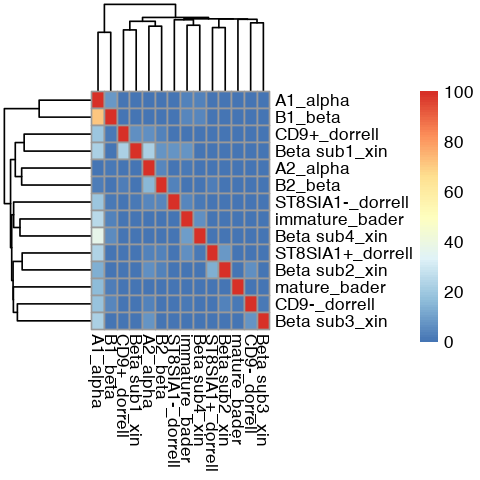

In [100]:
require(pheatmap)
pheatmap(round(res.intersect.df/diag(res.intersect.df)*100),scale="none")

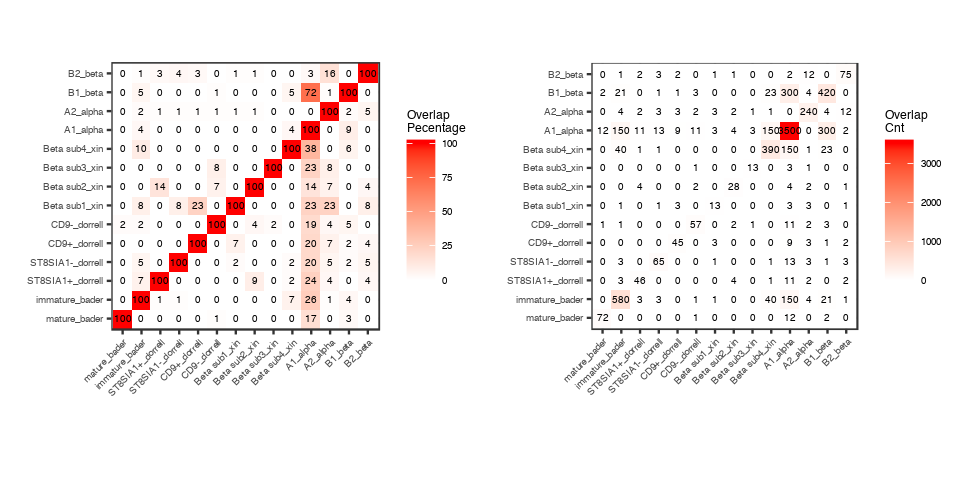

In [102]:
options(repr.plot.width =8, repr.plot.height = 4,repr.plot.scale=.5)
p1 <- ggplot(data = pd.melt, aes(Var2, Var1, fill = value))+
 geom_tile()+
 scale_fill_gradient(low = "white", high = "red", space = "Lab",
   name="Overlap\nPecentage") +
  theme_bw()+
    theme(text = element_text(size=7),axis.text.x = element_text(angle = 45, vjust = 1,  hjust = 1))+
coord_fixed()+ geom_text(aes(Var2, Var1, label = signif(value,2)), color = "black", size = 2)+xlab("")+ylab("")

p2 <- ggplot(data = pd.melt.cnt, aes(Var2, Var1, fill = value))+
 geom_tile()+
 scale_fill_gradient(low = "white", high = "red", space = "Lab",
   name="Overlap\nCnt") +
  theme_bw()+
    theme(text = element_text(size=7),axis.text.x = element_text(angle = 45, vjust = 1,  hjust = 1))+
coord_fixed()+ geom_text(aes(Var2, Var1, label = signif(value,2)), color = "black", size = 2)+xlab("")+ylab("")

require(ggpubr)
ggarrange(p1,p2,ncol=2)